## 1. VHM Dataset

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import thư viện và cài đặt môi trường trực quan
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
sns.set()

# Đọc dữ liệu từ tệp CSV
df = pd.read_csv('1-VHM Historical Data.csv')

# Chuyển đổi cột 'Date' thành định dạng datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Sắp xếp lại dữ liệu theo cột 'Date' theo thứ tự tăng dần
df = df.sort_values(by='Date').reset_index(drop=True)

# Hiển thị một số dòng cuối cùng của DataFrame
print(df.tail(10))
df

           Date   Price    Open    High     Low    Vol. Change %
1242 2024-02-19  45,550  43,000  45,650  42,900  20.16M    6.67%
1243 2024-02-20  46,150  46,000  46,700  45,850  12.93M    1.32%
1244 2024-02-21  45,000  46,100  46,100  44,800   8.95M   -2.49%
1245 2024-02-22  44,800  45,100  45,450  44,800   6.81M   -0.44%
1246 2024-02-23  43,450  45,000  45,100  43,250  11.75M   -3.01%
1247 2024-02-26  43,350  43,450  43,850  43,100   7.00M   -0.23%
1248 2024-02-27  44,200  43,750  44,200  43,300   7.16M    1.96%
1249 2024-02-28  44,400  44,450  44,900  44,000   6.28M    0.45%
1250 2024-02-29  43,400  44,550  44,700  43,400  11.04M   -2.25%
1251 2024-03-01  43,950  43,700  44,200  43,300   6.87M    1.27%


,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-01,"68,421","66,541","68,722","65,789",1.05M,4.00%
1,2019-03-04,"70,075","69,173","70,300","67,368",1.18M,2.42%
2,2019-03-05,"68,421","69,323","69,849","68,045",1.50M,-2.36%
3,2019-03-06,"69,022","68,421","69,097","68,270",770.13K,0.88%
4,2019-03-07,"69,173","69,173","71,654","69,097",1.70M,0.22%
...,...,...,...,...,...,...,...
1247,2024-02-26,"43,350","43,450","43,850","43,100",7.00M,-0.23%
1248,2024-02-27,"44,200","43,750","44,200","43,300",7.16M,1.96%
1249,2024-02-28,"44,400","44,450","44,900","44,000",6.28M,0.45%
1250,2024-02-29,"43,400","44,550","44,700","43,400",11.04M,-2.25%


In [20]:
# Loại bỏ các dấu phân tách hàng nghìn và chuyển đổi cột 'Price' sang định dạng số
df['Price'] = df['Price'].str.replace(',', '').astype(float)

#Lấy dữ liệu với cột Price
data = df.filter(['Price'])

#Đổi sang numpy array
dataset=data.values
# Số cột để train model (80%)
training_data_len=int(np.ceil(len(dataset)* .80))
training_data_len

1002

In [21]:
!pip install minisom

#Chuẩn hóa dữ liệu

# Scale the data importing Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
# Normalize the input features using Min-Max scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dataset)

In [22]:
# Create the training data set
train_data = scaled_features[0:int(training_data_len), :]
# Create and train the Self-Organizing Map (SOM)
som_grid_size = (10, 10) # Example: 10x10 grid
som = MiniSom(som_grid_size[0], som_grid_size[1], train_data.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(scaled_features)
som.train_random(train_data, num_iteration=1000)
# The clustered data from the SOM
# clustered_data = np.zeros(scaled_features.shape[0:int(training_data_len)])
clustered_data = np.zeros(train_data.shape[0], dtype=int)
# clustered_data = scaled_features[0:int(training_data_len), :]
for i, x in enumerate(clustered_data):
  w = som.winner (x)
  clustered_data[i] = w[0] * som_grid_size[0] + w[1]
# train_data
x_train = []
y_train = []
for i in range(20, len(train_data)):
  x_train.append(train_data[i-20:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 21:
    print(x_train)
    print(y_train)
    print()
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data.
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape
# print(x_train.shape[0])
# print(x_train.shape[1])

[array([0.5961768 , 0.62907782, 0.5961768 , 0.60813176, 0.61113542,
       0.60365611, 0.58121817, 0.61561108, 0.64103278, 0.64103278,
       0.6305697 , 0.64552833, 0.64103278, 0.61411919, 0.55430458,
       0.59766868, 0.56625955, 0.57972629, 0.58271006, 0.62758593])]
[0.6036561107574793]

[array([0.5961768 , 0.62907782, 0.5961768 , 0.60813176, 0.61113542,
       0.60365611, 0.58121817, 0.61561108, 0.64103278, 0.64103278,
       0.6305697 , 0.64552833, 0.64103278, 0.61411919, 0.55430458,
       0.59766868, 0.56625955, 0.57972629, 0.58271006, 0.62758593]), array([0.62907782, 0.5961768 , 0.60813176, 0.61113542, 0.60365611,
       0.58121817, 0.61561108, 0.64103278, 0.64103278, 0.6305697 ,
       0.64552833, 0.64103278, 0.61411919, 0.55430458, 0.59766868,
       0.56625955, 0.57972629, 0.58271006, 0.62758593, 0.60365611])]
[0.6036561107574793, 0.617102959898154]



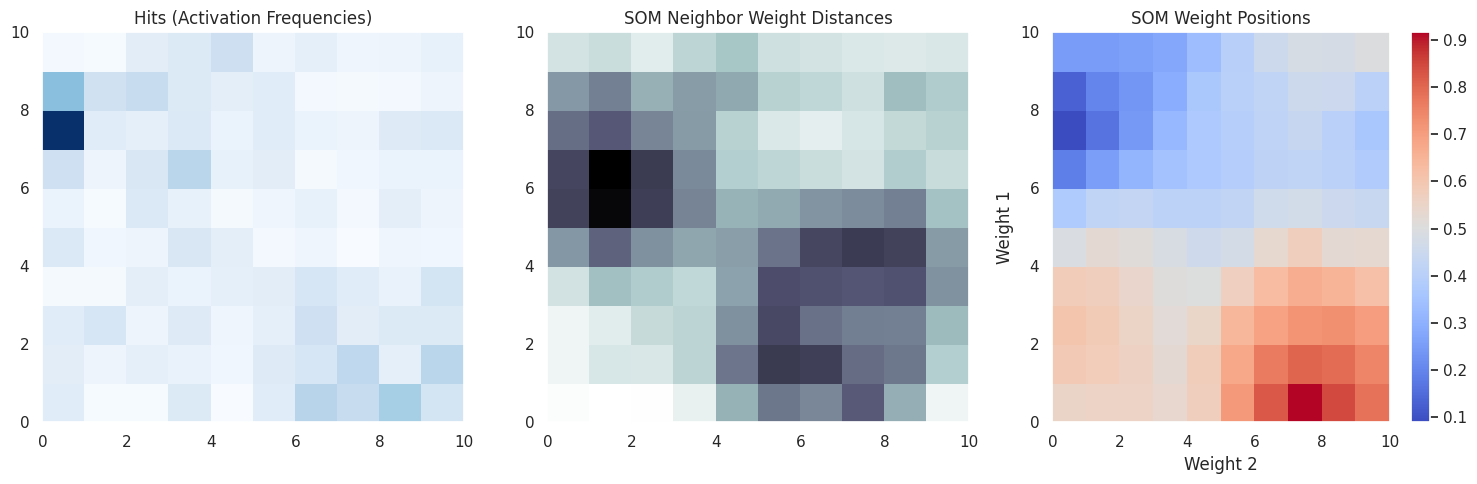

In [23]:
# Plot the Hits (Activation Frequencies) of each neuron
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.pcolor(som.activation_response(scaled_features).T, cmap='Blues')
plt.colormaps()
plt.title('Hits (Activation Frequencies)')
# plt.xlabel('Neuron X')
# plt.ylabel('Neuron Y')
# Plot the SOM neighbor weight distances
plt.subplot(132)
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colormaps()
plt.title('SOM Neighbor Weight Distances')
# plt.xlabel('Neuron X')
# plt.ylabel('Neuron Y')
# Plot the SOM weight positions
plt.subplot(133)
plt.pcolor(som.get_weights()[..., 0].T, cmap='coolwarm')
plt.colorbar()
plt.title('SOM Weight Positions')
plt.xlabel('Weight 2')
plt.ylabel('Weight 1')
plt.tight_layout()
plt.show()

In [24]:
# Build the MLP model with 3 hidden layers
# P.H1.H2.H3.Q, describes the architecture of an MLP with three hidden layers
# with the help of functional API,
import tensorflow as tf
input_layer = tf.keras.Input(shape = (20,))
hidden1 = tf.keras.layers.Dense(30, activation='sigmoid')(input_layer)
hidden2 = tf.keras.layers.Dense(32, activation="sigmoid")(hidden1)
hidden3 = tf.keras.layers.Dense(1, activation='tanh')(hidden2)
# concat = tf.keras.layers.concatenate()([input_layer, hidden3])
output_layer = tf.keras.layers.Dense(1) (hidden3)
model = tf.keras.models.Model(inputs=[input_layer], outputs=[output_layer])
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model

# batch_size --> the hyperparameter of gradient descent that controls the
# number of training samples to work through before the model's internal parameters are updated
# epochs --> the hyperparameter of gradient descent that controls the number of complete passes through the training dataset
model.fit(x_train, y_train, batch_size=32, epochs=100)
# model.fit(x_train, y_train, epochs=1, batch_size=1, validation_split=0.2)

Epoch 1/100
31/31 [==============================] - 1s 3ms/step - loss: 0.0419
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0269
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 8/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 9/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 10/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 11/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 12/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 13/100
31/31 [=================

In [25]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_4 (Dense)             (None, 30)                630       
                                                                 
 dense_5 (Dense)             (None, 32)                992       
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 1657 (6.47 KB)
Trainable params: 1657 (6.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
from sklearn import metrics

# Create the testing data set
# Create a new array containing scaled values from index
# test_data = scaled_data[training_data_len - 20:, :]
test_data = scaled_features[training_data_len - 20:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


8/8 [==============================] - 0s 2ms/step


1460.825378622669

In [27]:
# Dự đoán 30 ngày tiếp theo
val_data = scaled_features[training_data_len:training_data_len + 100, :]

# Khởi tạo đầu vào dự đoán
x_input = val_data[-20:].reshape(1, -1)
temp_input = list(x_input[0])

lst_output = []
i = 0
while i < 30:
    if len(temp_input) > 20:
        x_input = np.array(temp_input[-20:])
        x_input = x_input.reshape(1, -1)
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, 20))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

# Chuyển đổi lst_output về giá trị thực
lst_output = scaler.inverse_transform(lst_output)

<ipython-input-28-f0a3f18a121e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


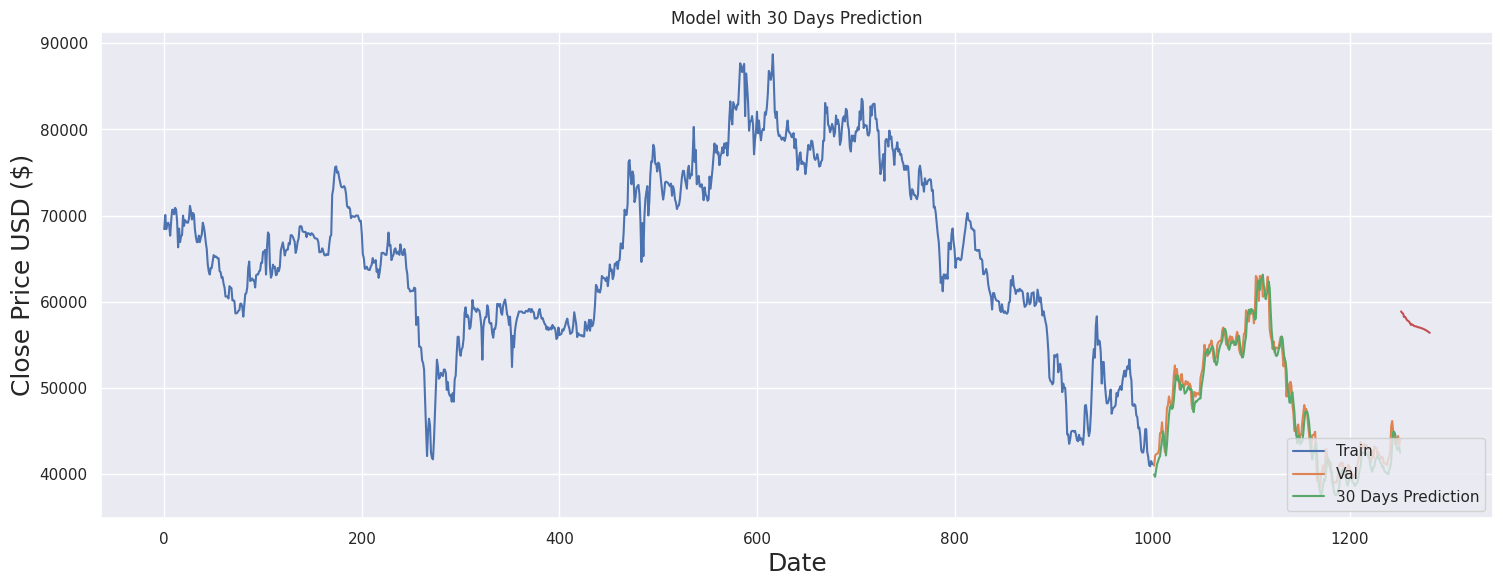

In [28]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Vẽ dữ liệu bao gồm dự đoán 30 ngày tiếp theo
plt.figure(figsize=(16, 6))
plt.title('Model with 30 Days Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.plot(range(len(df), len(df) + 30), lst_output)
plt.legend(['Train', 'Val', '30 Days Prediction'], loc='lower right')
plt.show()

In [29]:
from sklearn import metrics

# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R²)
r2 = metrics.r2_score(y_test, predictions)
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 1166.936984375
Mean Squared Error (MSE): 2134010.786828064
Root Mean Squared Error (RMSE): 1460.825378622669
R-squared (R²): 0.9525719521004015


## 2. NVL Dataset

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import thư viện và cài đặt môi trường trực quan
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
sns.set()

# Đọc dữ liệu từ tệp CSV
df = pd.read_csv('2-NVL Historical Data.csv')

# Chuyển đổi cột 'Date' thành định dạng datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Sắp xếp lại dữ liệu theo cột 'Date' theo thứ tự tăng dần
df = df.sort_values(by='Date').reset_index(drop=True)

# Hiển thị một số dòng cuối cùng của DataFrame
print(df.tail(10))
df

           Date   Price    Open    High     Low    Vol. Change %
1242 2024-02-19  17,550  17,700  17,800  17,400  29.94M   -0.85%
1243 2024-02-20  17,550  17,550  17,650  17,300  36.29M    0.00%
1244 2024-02-21  17,350  17,700  17,800  17,300  30.97M   -1.14%
1245 2024-02-22  17,100  17,350  17,400  17,100  22.16M   -1.44%
1246 2024-02-23  16,650  17,100  17,250  16,600  37.28M   -2.63%
1247 2024-02-26  16,800  16,800  16,950  16,550  23.43M    0.90%
1248 2024-02-27  17,050  16,950  17,100  16,750  22.16M    1.49%
1249 2024-02-28  17,000  17,150  17,200  16,850  14.95M   -0.29%
1250 2024-02-29  17,100  17,000  17,300  16,900  30.60M    0.59%
1251 2024-03-01  17,300  17,150  17,400  17,050  21.86M    1.17%


,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-01,"32,933","31,765","32,933","31,765",891.22K,2.95%
1,2019-03-04,"33,100","32,933","33,378","32,600",899.13K,0.51%
2,2019-03-05,"32,711","32,989","33,211","32,544",963.79K,-1.18%
3,2019-03-06,"31,709","32,711","32,711","31,487",1.58M,-3.06%
4,2019-03-07,"31,932","31,709","32,210","31,709",849.59K,0.70%
...,...,...,...,...,...,...,...
1247,2024-02-26,"16,800","16,800","16,950","16,550",23.43M,0.90%
1248,2024-02-27,"17,050","16,950","17,100","16,750",22.16M,1.49%
1249,2024-02-28,"17,000","17,150","17,200","16,850",14.95M,-0.29%
1250,2024-02-29,"17,100","17,000","17,300","16,900",30.60M,0.59%


In [31]:
# Loại bỏ các dấu phân tách hàng nghìn và chuyển đổi cột 'Price' sang định dạng số
df['Price'] = df['Price'].str.replace(',', '').astype(float)

#Lấy dữ liệu với cột Price
data = df.filter(['Price'])

#Đổi sang numpy array
dataset=data.values
# Số cột để train model (80%)
training_data_len=int(np.ceil(len(dataset)* .80))
training_data_len

1002

In [32]:
!pip install minisom

#Chuẩn hóa dữ liệu

# Scale the data importing Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
# Normalize the input features using Min-Max scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dataset)

In [33]:
# Create the training data set
train_data = scaled_features[0:int(training_data_len), :]
# Create and train the Self-Organizing Map (SOM)
som_grid_size = (10, 10) # Example: 10x10 grid
som = MiniSom(som_grid_size[0], som_grid_size[1], train_data.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(scaled_features)
som.train_random(train_data, num_iteration=1000)
# The clustered data from the SOM
# clustered_data = np.zeros(scaled_features.shape[0:int(training_data_len)])
clustered_data = np.zeros(train_data.shape[0], dtype=int)
# clustered_data = scaled_features[0:int(training_data_len), :]
for i, x in enumerate(clustered_data):
  w = som.winner (x)
  clustered_data[i] = w[0] * som_grid_size[0] + w[1]
# train_data
x_train = []
y_train = []
for i in range(20, len(train_data)):
  x_train.append(train_data[i-20:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 21:
    print(x_train)
    print(y_train)
    print()
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data.
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape
# print(x_train.shape[0])
# print(x_train.shape[1])

[array([0.27623119, 0.27826489, 0.27352769, 0.26132544, 0.26404111,
       0.26472307, 0.28233231, 0.2985898 , 0.28978518, 0.29452238,
       0.28098056, 0.27623119, 0.27081202, 0.27014224, 0.26132544,
       0.26404111, 0.2572702 , 0.25862195, 0.2599737 , 0.25590628])]
[0.2532027863023041]

[array([0.27623119, 0.27826489, 0.27352769, 0.26132544, 0.26404111,
       0.26472307, 0.28233231, 0.2985898 , 0.28978518, 0.29452238,
       0.28098056, 0.27623119, 0.27081202, 0.27014224, 0.26132544,
       0.26404111, 0.2572702 , 0.25862195, 0.2599737 , 0.25590628]), array([0.27826489, 0.27352769, 0.26132544, 0.26404111, 0.26472307,
       0.28233231, 0.2985898 , 0.28978518, 0.29452238, 0.28098056,
       0.27623119, 0.27081202, 0.27014224, 0.26132544, 0.26404111,
       0.2572702 , 0.25862195, 0.2599737 , 0.25590628, 0.25320279])]
[0.2532027863023041, 0.25116907788981446]



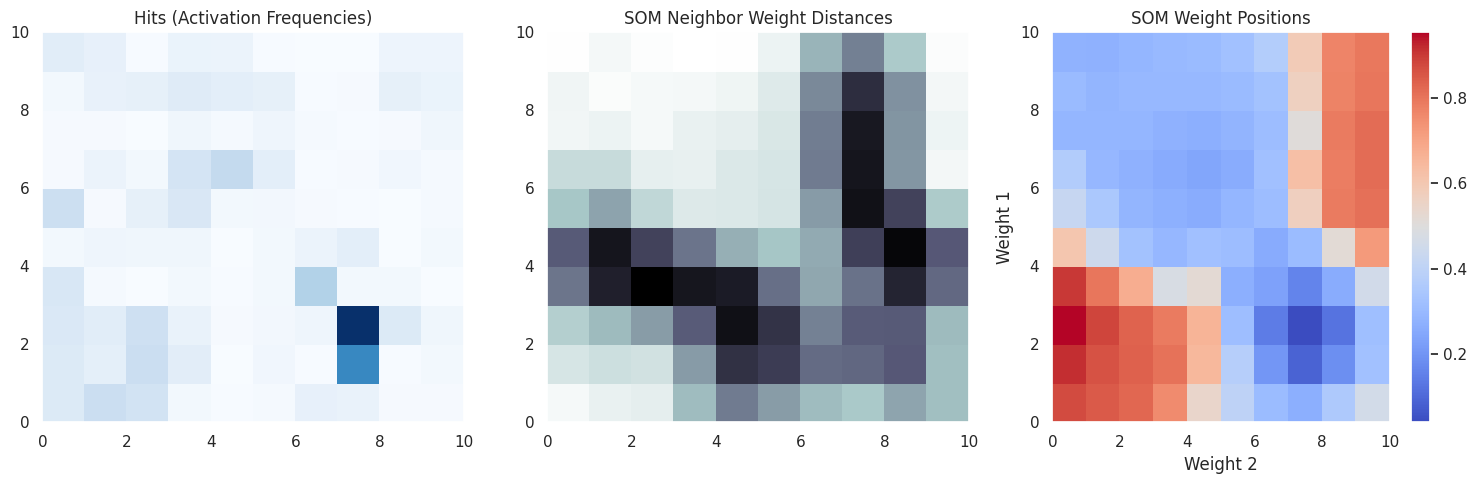

In [34]:
# Plot the Hits (Activation Frequencies) of each neuron
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.pcolor(som.activation_response(scaled_features).T, cmap='Blues')
plt.colormaps()
plt.title('Hits (Activation Frequencies)')
# plt.xlabel('Neuron X')
# plt.ylabel('Neuron Y')
# Plot the SOM neighbor weight distances
plt.subplot(132)
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colormaps()
plt.title('SOM Neighbor Weight Distances')
# plt.xlabel('Neuron X')
# plt.ylabel('Neuron Y')
# Plot the SOM weight positions
plt.subplot(133)
plt.pcolor(som.get_weights()[..., 0].T, cmap='coolwarm')
plt.colorbar()
plt.title('SOM Weight Positions')
plt.xlabel('Weight 2')
plt.ylabel('Weight 1')
plt.tight_layout()
plt.show()

In [35]:
# Build the MLP model with 3 hidden layers
# P.H1.H2.H3.Q, describes the architecture of an MLP with three hidden layers
# with the help of functional API,
import tensorflow as tf
input_layer = tf.keras.Input(shape = (20,))
hidden1 = tf.keras.layers.Dense(30, activation='sigmoid')(input_layer)
hidden2 = tf.keras.layers.Dense(32, activation="sigmoid")(hidden1)
hidden3 = tf.keras.layers.Dense(1, activation='tanh')(hidden2)
# concat = tf.keras.layers.concatenate()([input_layer, hidden3])
output_layer = tf.keras.layers.Dense(1) (hidden3)
model = tf.keras.models.Model(inputs=[input_layer], outputs=[output_layer])
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model

# batch_size --> the hyperparameter of gradient descent that controls the
# number of training samples to work through before the model's internal parameters are updated
# epochs --> the hyperparameter of gradient descent that controls the number of complete passes through the training dataset
model.fit(x_train, y_train, batch_size=32, epochs=100)
# model.fit(x_train, y_train, epochs=1, batch_size=1, validation_split=0.2)

Epoch 1/100
31/31 [==============================] - 1s 2ms/step - loss: 0.2291
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0816
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0771
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0746
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0714
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0605
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0523
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0426
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0326
Epoch 11/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0236
Epoch 12/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 13/100
31/31 [=================

In [36]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_8 (Dense)             (None, 30)                630       
                                                                 
 dense_9 (Dense)             (None, 32)                992       
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 1657 (6.47 KB)
Trainable params: 1657 (6.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
from sklearn import metrics

# Create the testing data set
# Create a new array containing scaled values from index
# test_data = scaled_data[training_data_len - 20:, :]
test_data = scaled_features[training_data_len - 20:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


8/8 [==============================] - 0s 2ms/step


683.0920249124093

In [38]:
# Dự đoán 30 ngày tiếp theo
val_data = scaled_features[training_data_len:training_data_len + 100, :]

# Khởi tạo đầu vào dự đoán
x_input = val_data[-20:].reshape(1, -1)
temp_input = list(x_input[0])

lst_output = []
i = 0
while i < 30:
    if len(temp_input) > 20:
        x_input = np.array(temp_input[-20:])
        x_input = x_input.reshape(1, -1)
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, 20))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

# Chuyển đổi lst_output về giá trị thực
lst_output = scaler.inverse_transform(lst_output)

<ipython-input-39-f0a3f18a121e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


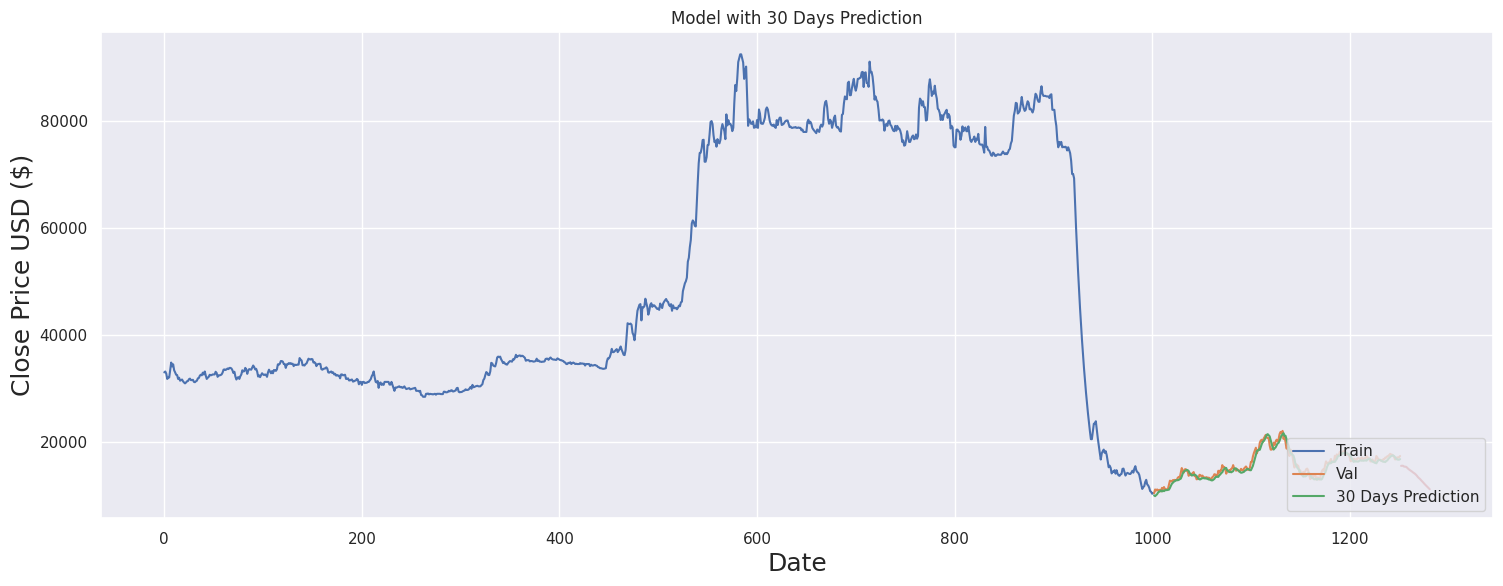

In [39]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Vẽ dữ liệu bao gồm dự đoán 30 ngày tiếp theo
plt.figure(figsize=(16, 6))
plt.title('Model with 30 Days Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.plot(range(len(df), len(df) + 30), lst_output)
plt.legend(['Train', 'Val', '30 Days Prediction'], loc='lower right')
plt.show()

In [40]:
from sklearn import metrics

# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R²)
r2 = metrics.r2_score(y_test, predictions)
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 532.66087109375
Mean Squared Error (MSE): 466614.7144989357
Root Mean Squared Error (RMSE): 683.0920249124093
R-squared (R²): 0.9243137174594145


## 3. NLG Dataset

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import thư viện và cài đặt môi trường trực quan
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
sns.set()

# Đọc dữ liệu từ tệp CSV
df = pd.read_csv('3-NLG Historical Data.csv')

# Chuyển đổi cột 'Date' thành định dạng datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Sắp xếp lại dữ liệu theo cột 'Date' theo thứ tự tăng dần
df = df.sort_values(by='Date').reset_index(drop=True)

# Hiển thị một số dòng cuối cùng của DataFrame
print(df.tail(10))
df

           Date     Price      Open      High       Low   Vol. Change %
1242 2024-02-19  38,750.0  39,500.0  39,500.0  38,700.0  4.68M   -1.40%
1243 2024-02-20  38,950.0  38,900.0  39,300.0  38,750.0  1.91M    0.52%
1244 2024-02-21  39,000.0  38,800.0  39,700.0  38,700.0  2.31M    0.13%
1245 2024-02-22  39,000.0  38,900.0  39,250.0  38,900.0  1.39M    0.00%
1246 2024-02-23  37,700.0  39,100.0  39,100.0  37,500.0  4.64M   -3.33%
1247 2024-02-26  37,400.0  37,650.0  37,750.0  37,100.0  2.49M   -0.80%
1248 2024-02-27  38,500.0  37,500.0  38,700.0  37,500.0  2.35M    2.94%
1249 2024-02-28  38,200.0  38,700.0  38,750.0  38,000.0  1.74M   -0.78%
1250 2024-02-29  39,600.0  38,500.0  39,700.0  38,150.0  8.04M    3.66%
1251 2024-03-01  39,900.0  39,800.0  39,950.0  39,300.0  3.46M    0.76%


,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-01,"18,706.8","18,496.6","18,776.9","18,496.6",365.80K,1.14%
1,2019-03-04,"19,127.2","18,706.8","19,127.2","18,636.7",1.08M,2.25%
2,2019-03-05,"18,917.0","19,127.2","19,127.2","18,846.9",468.76K,-1.10%
3,2019-03-06,"18,846.9","18,987.1","19,057.1","18,811.9",225.18K,-0.37%
4,2019-03-07,"18,706.8","18,846.9","18,987.1","18,671.8",453.92K,-0.74%
...,...,...,...,...,...,...,...
1247,2024-02-26,"37,400.0","37,650.0","37,750.0","37,100.0",2.49M,-0.80%
1248,2024-02-27,"38,500.0","37,500.0","38,700.0","37,500.0",2.35M,2.94%
1249,2024-02-28,"38,200.0","38,700.0","38,750.0","38,000.0",1.74M,-0.78%
1250,2024-02-29,"39,600.0","38,500.0","39,700.0","38,150.0",8.04M,3.66%


In [42]:
# Loại bỏ các dấu phân tách hàng nghìn và chuyển đổi cột 'Price' sang định dạng số
df['Price'] = df['Price'].str.replace(',', '').astype(float)

#Lấy dữ liệu với cột Price
data = df.filter(['Price'])

#Đổi sang numpy array
dataset=data.values
# Số cột để train model (80%)
training_data_len=int(np.ceil(len(dataset)* .80))
training_data_len

1002

In [43]:
!pip install minisom

#Chuẩn hóa dữ liệu

# Scale the data importing Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
# Normalize the input features using Min-Max scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dataset)

In [44]:
# Create the training data set
train_data = scaled_features[0:int(training_data_len), :]
# Create and train the Self-Organizing Map (SOM)
som_grid_size = (10, 10) # Example: 10x10 grid
som = MiniSom(som_grid_size[0], som_grid_size[1], train_data.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(scaled_features)
som.train_random(train_data, num_iteration=1000)
# The clustered data from the SOM
# clustered_data = np.zeros(scaled_features.shape[0:int(training_data_len)])
clustered_data = np.zeros(train_data.shape[0], dtype=int)
# clustered_data = scaled_features[0:int(training_data_len), :]
for i, x in enumerate(clustered_data):
  w = som.winner (x)
  clustered_data[i] = w[0] * som_grid_size[0] + w[1]
# train_data
x_train = []
y_train = []
for i in range(20, len(train_data)):
  x_train.append(train_data[i-20:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 21:
    print(x_train)
    print(y_train)
    print()
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data.
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape
# print(x_train.shape[0])
# print(x_train.shape[1])

[array([0.08706471, 0.09559049, 0.0913276 , 0.08990596, 0.08706471,
       0.08422346, 0.08848635, 0.09416885, 0.08990596, 0.10198482,
       0.10553587, 0.10553587, 0.10127299, 0.10056318, 0.08848635,
       0.09274924, 0.07853894, 0.08564307, 0.08422346, 0.09416885])]
[0.09843173600111943]

[array([0.08706471, 0.09559049, 0.0913276 , 0.08990596, 0.08706471,
       0.08422346, 0.08848635, 0.09416885, 0.08990596, 0.10198482,
       0.10553587, 0.10553587, 0.10127299, 0.10056318, 0.08848635,
       0.09274924, 0.07853894, 0.08564307, 0.08422346, 0.09416885]), array([0.09559049, 0.0913276 , 0.08990596, 0.08706471, 0.08422346,
       0.08848635, 0.09416885, 0.08990596, 0.10198482, 0.10553587,
       0.10553587, 0.10127299, 0.10056318, 0.08848635, 0.09274924,
       0.07853894, 0.08564307, 0.08422346, 0.09416885, 0.09843174])]
[0.09843173600111943, 0.09701009748668105]



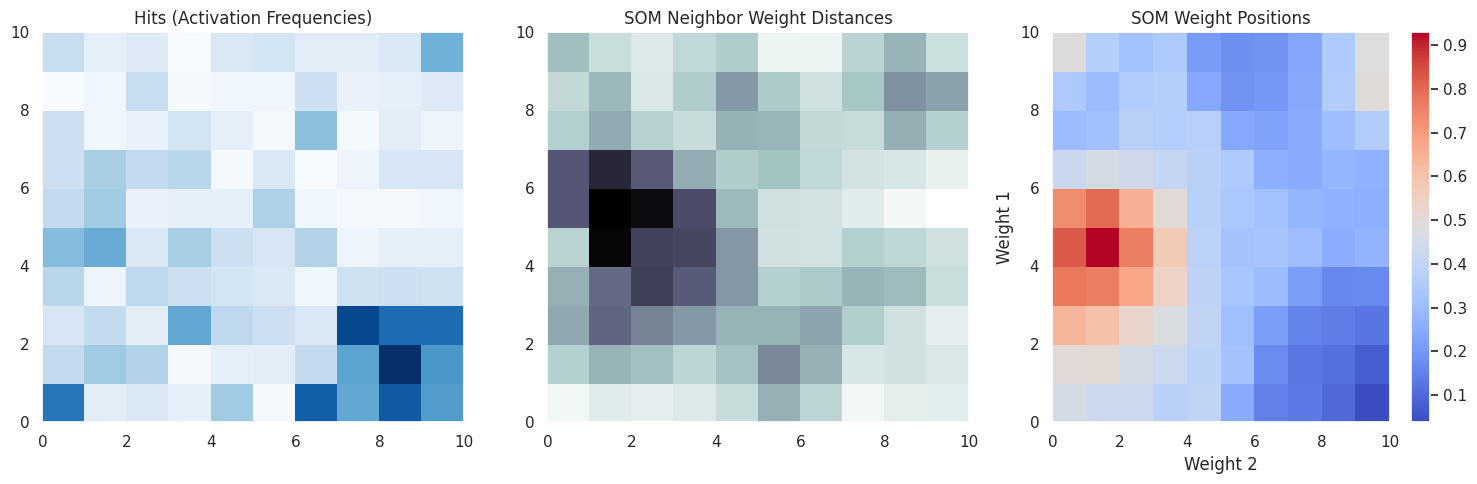

In [45]:
# Plot the Hits (Activation Frequencies) of each neuron
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.pcolor(som.activation_response(scaled_features).T, cmap='Blues')
plt.colormaps()
plt.title('Hits (Activation Frequencies)')
# plt.xlabel('Neuron X')
# plt.ylabel('Neuron Y')
# Plot the SOM neighbor weight distances
plt.subplot(132)
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colormaps()
plt.title('SOM Neighbor Weight Distances')
# plt.xlabel('Neuron X')
# plt.ylabel('Neuron Y')
# Plot the SOM weight positions
plt.subplot(133)
plt.pcolor(som.get_weights()[..., 0].T, cmap='coolwarm')
plt.colorbar()
plt.title('SOM Weight Positions')
plt.xlabel('Weight 2')
plt.ylabel('Weight 1')
plt.tight_layout()
plt.show()

In [46]:
# Build the MLP model with 3 hidden layers
# P.H1.H2.H3.Q, describes the architecture of an MLP with three hidden layers
# with the help of functional API,
import tensorflow as tf
input_layer = tf.keras.Input(shape = (20,))
hidden1 = tf.keras.layers.Dense(30, activation='sigmoid')(input_layer)
hidden2 = tf.keras.layers.Dense(32, activation="sigmoid")(hidden1)
hidden3 = tf.keras.layers.Dense(1, activation='tanh')(hidden2)
# concat = tf.keras.layers.concatenate()([input_layer, hidden3])
output_layer = tf.keras.layers.Dense(1) (hidden3)
model = tf.keras.models.Model(inputs=[input_layer], outputs=[output_layer])
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model

# batch_size --> the hyperparameter of gradient descent that controls the
# number of training samples to work through before the model's internal parameters are updated
# epochs --> the hyperparameter of gradient descent that controls the number of complete passes through the training dataset
model.fit(x_train, y_train, batch_size=32, epochs=100)
# model.fit(x_train, y_train, epochs=1, batch_size=1, validation_split=0.2)

Epoch 1/100
31/31 [==============================] - 1s 3ms/step - loss: 0.1837
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0371
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0276
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0210
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0156
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 8/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 9/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 10/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 11/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 12/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 13/100
31/31 [=================

In [47]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_12 (Dense)            (None, 30)                630       
                                                                 
 dense_13 (Dense)            (None, 32)                992       
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 1657 (6.47 KB)
Trainable params: 1657 (6.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
from sklearn import metrics

# Create the testing data set
# Create a new array containing scaled values from index
# test_data = scaled_data[training_data_len - 20:, :]
test_data = scaled_features[training_data_len - 20:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


8/8 [==============================] - 0s 2ms/step


1187.0347150389864

In [49]:
# Dự đoán 30 ngày tiếp theo
val_data = scaled_features[training_data_len:training_data_len + 100, :]

# Khởi tạo đầu vào dự đoán
x_input = val_data[-20:].reshape(1, -1)
temp_input = list(x_input[0])

lst_output = []
i = 0
while i < 30:
    if len(temp_input) > 20:
        x_input = np.array(temp_input[-20:])
        x_input = x_input.reshape(1, -1)
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, 20))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

# Chuyển đổi lst_output về giá trị thực
lst_output = scaler.inverse_transform(lst_output)

<ipython-input-50-f0a3f18a121e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


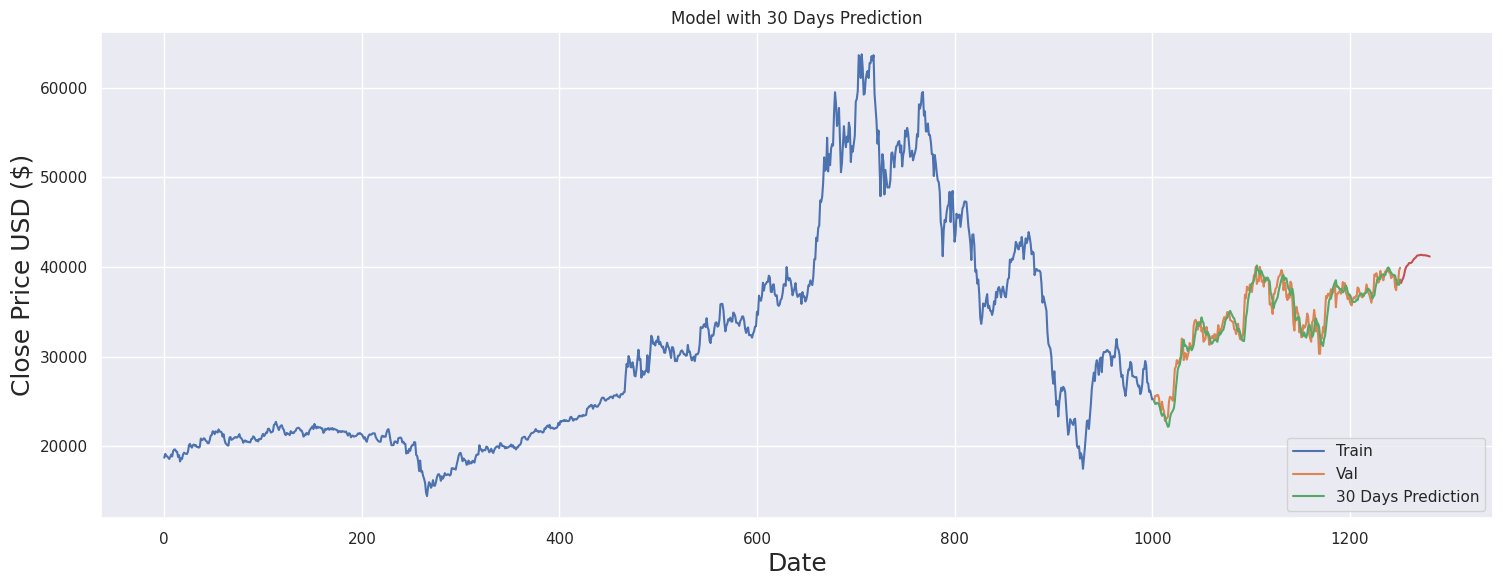

In [50]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Vẽ dữ liệu bao gồm dự đoán 30 ngày tiếp theo
plt.figure(figsize=(16, 6))
plt.title('Model with 30 Days Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.plot(range(len(df), len(df) + 30), lst_output)
plt.legend(['Train', 'Val', '30 Days Prediction'], loc='lower right')
plt.show()

In [51]:
from sklearn import metrics

# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R²)
r2 = metrics.r2_score(y_test, predictions)
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 913.3773828125
Mean Squared Error (MSE): 1409051.4147076875
Root Mean Squared Error (RMSE): 1187.0347150389864
R-squared (R²): 0.914676937550302
